In [36]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

In [37]:
data_table={
    "x":[1,5,1.5,8,1,9,15,20,19],
    "y":[2,8,1.8,8,0.6,11,16,23,15]
}

data=pd.DataFrame(data_table)

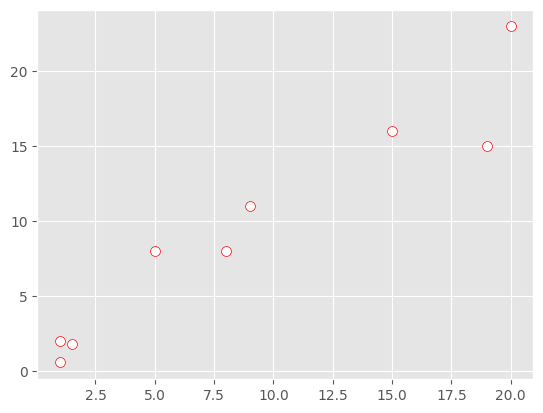

In [38]:
plt.scatter(
   data["x"], data['y'],
   c='white', marker='o',
   edgecolor='red', s=50
)
plt.show()

In [39]:
data.head(data.shape[0])

,x,y
0,1.0,2.0
1,5.0,8.0
2,1.5,1.8
3,8.0,8.0
4,1.0,0.6
5,9.0,11.0
6,15.0,16.0
7,20.0,23.0
8,19.0,15.0


In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 1.16666667  1.46666667]
 [18.         18.        ]
 [ 7.33333333  9.        ]]
[0 2 0 2 0 2 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
data

,x,y
0,1.0,2.0
1,5.0,8.0
2,1.5,1.8
3,8.0,8.0
4,1.0,0.6
5,9.0,11.0
6,15.0,16.0
7,20.0,23.0
8,19.0,15.0


In [46]:
data['labels'] = labels
data.head(data.shape[0])


,x,y,labels
0,1.0,2.0,0
1,5.0,8.0,2
2,1.5,1.8,0
3,8.0,8.0,2
4,1.0,0.6,0
5,9.0,11.0,2
6,15.0,16.0,1
7,20.0,23.0,1
8,19.0,15.0,1


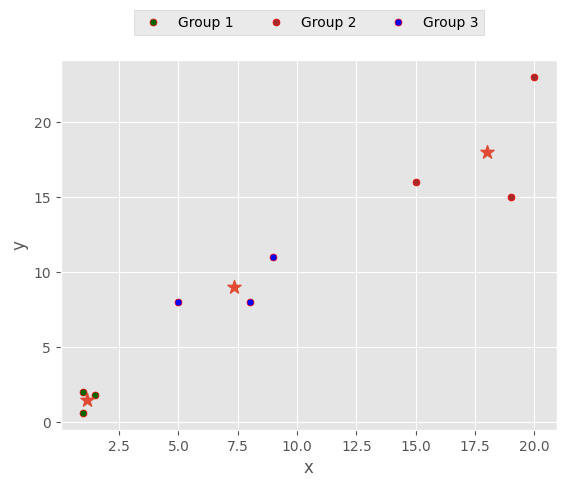

In [72]:
data['labels'] = labels

#plt.plot(data, colors[data['labels'], markersize = 10)

group1 = data[data['labels']==0].plot( kind='scatter', x='x', y='y', c='DarkGreen', label="Group 1" , marker='o',edgecolor='red', s=25)
group2 = data[data['labels']==1].plot( kind='scatter', x='x', y='y', c='Brown', ax=group1, label="Group 2" , marker='o',edgecolor='red', s=25)
group3 = data[data['labels']==2].plot( kind='scatter', x='x', y='y', c='Blue', ax=group1, label="Group 3" , marker='o',edgecolor='red', s=25)






group1.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=False, shadow=False)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "*", s=100, linewidths = 1, zorder = 5)

plt.show()



---



In [7]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv("Train.csv")

In [20]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [21]:
df = df.drop(["Segmentation", 'ID'], axis="columns")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [23]:
df = df.dropna().reset_index(drop = True)

***convert categorical values to numerical data***

In [24]:
df_kmeans = pd.get_dummies(df, drop_first=True)
df_kmeans.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,67,1.0,1.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,67,0.0,2.0,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,56,0.0,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,32,1.0,3.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

In [27]:
cluster_col_index = df_kmeans.columns.get_loc("Age")

1

In [26]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(cluster_col_index, "Cluster", clusters) #creating a cluster colum
df_kmeans.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,22,1.0,4.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,67,1.0,1.0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2,67,0.0,2.0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [28]:
df_kmeans.Cluster.unique()

array([1, 2, 0], dtype=int32)

 **ideal number of clusters with the elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

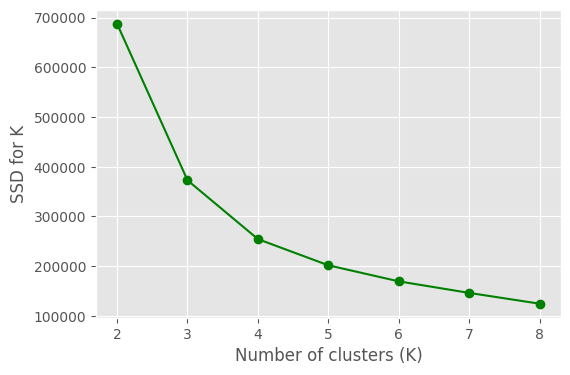

In [29]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()